In [1]:
#Load Dataset
import pandas as pd
df=pd.read_csv("rainfall_data.csv")

In [5]:
#Count total number of records
df.shape[0]

970339

In [7]:
#List all unique states in the dataset
df['state'].unique()

array(['JK', 'PB', 'HP', 'HR', 'CH', 'UP', 'RJ', 'DL', 'AR', 'WB', 'SK',
       'AS', 'MP', 'BR', 'ML', 'NL', 'GJ', 'TR', 'MN', 'MZ', 'OR', 'MH',
       'CT', 'DD', 'KA', 'AP', 'GA', 'TN', 'LD', 'AN', 'KL', 'PY'],
      dtype=object)

In [11]:
#Count number of weather stations per state
df.groupby('state')['station_name'].nunique()

state
AN     7
AP    34
AR     1
AS    15
BR    16
CH     1
CT     2
DD     2
DL     2
GA     3
GJ    25
HP    11
HR     6
JK     6
KA    34
KL    16
LD     4
MH    39
ML     3
MN     1
MP    41
MZ     2
NL     2
OR    16
PB     6
PY     2
RJ    22
SK     1
TN    29
TR     2
UP    31
WB    24
Name: station_name, dtype: int64

In [13]:
#Find total rainfall recorded in each state
df.groupby('state')['rainfall'].sum()

state
AN    109059.9
AP    233686.4
AR     34835.6
AS    251973.2
BR    133482.6
CH      8307.8
CT     10786.3
DD     14607.6
DL     15250.3
GA     87942.8
GJ    150338.4
HP     75117.3
HR     24295.9
JK     57859.3
KA    357012.8
KL    291966.5
LD     41386.3
MH    421407.6
ML     47965.6
MN     12661.9
MP    261357.6
MZ     12882.9
NL     13360.3
OR    160994.7
PB     29469.9
PY     31391.9
RJ     85175.2
SK     16600.6
TN    268315.9
TR     43132.9
UP    217195.3
WB    234796.9
Name: rainfall, dtype: float64

In [15]:
#Find average rainfall for each season
df.groupby('season')['rainfall'].mean()

season
Monsoon         10.547765
Post-monsoon     4.031521
Summer           5.127311
Winter           1.165040
Name: rainfall, dtype: float64

In [17]:
#Identify the season with highest average rainfall
df.groupby('season')['rainfall'].mean().idxmax()

'Monsoon'

In [19]:
#Find top 10 districts with highest rainfall
df.groupby('district')['rainfall'].sum().sort_values(ascending=False).head(10)

district
Uttara Kannada      107170.2
Dakshina Kannada     73506.3
Ratnagiri            66276.9
South Andaman        62802.1
Mumbai Suburban      60969.6
Kozhikode            59077.9
South Goa            58372.3
Satara               57825.9
Jalpaiguri           52276.2
Ernakulam            51902.5
Name: rainfall, dtype: float64

In [21]:
#Find average temperature for each month
df.groupby('month')['avg_temp'].mean()

month
April        29.100049
August       27.437673
December     20.525492
February     22.235994
January      19.594499
July         27.781627
June         29.544730
March        25.979654
May          30.315485
November     23.287213
October      26.124751
September    27.236874
Name: avg_temp, dtype: float64

In [23]:
#Find difference between max and min temperature
df['temp_difference'] = df['max_temp'] - df['min_temp']
df[['temp_difference']].head()

,temp_difference
0,5.8
1,2.8
2,3.4
3,3.9
4,7.3


In [25]:
#Find days with extreme rainfall (> 100 mm)
df[df['rainfall'] > 100]

,date_of_record,month,season,station_name,state,district,avg_temp,min_temp,max_temp,wind_speed,air_pressure,elevation,latitude,longitude,rainfall,temp_difference
11761,2015-04-05 00:00:00,April,Summer,Jammu,JK,Jammu,20.7,NaN,NaN,NaN,NaN,366,32.6667,74.8333,110.0,NaN
11864,2015-07-17 00:00:00,July,Monsoon,Jammu,JK,Jammu,26.8,NaN,NaN,NaN,NaN,366,32.6667,74.8333,119.9,NaN
11865,2015-07-18 00:00:00,July,Monsoon,Jammu,JK,Jammu,27.2,NaN,NaN,NaN,NaN,366,32.6667,74.8333,190.0,NaN
12240,2016-07-27 00:00:00,July,Monsoon,Jammu,JK,Jammu,25.2,22.8,27.2,NaN,NaN,366,32.6667,74.8333,109.0,4.4
12246,2016-08-02 00:00:00,August,Monsoon,Jammu,JK,Jammu,26.9,22.1,31.5,NaN,NaN,366,32.6667,74.8333,106.9,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963939,2024-11-30 00:00:00,November,Post-monsoon,Pondicherry / Auroville,TN,Puducherry,23.6,23.0,24.1,35.0,1001.5,36,11.9687,79.8101,116.6,1.1
964945,2023-07-26 00:00:00,July,Monsoon,Rajahmundry / R?j?nagaram,AP,East Godavari,26.4,24.8,28.0,22.2,1000.5,46,17.1104,81.8182,109.1,3.2
965812,2021-11-11 00:00:00,November,Post-monsoon,Tirupati / Renigunta,AP,Tirupati,22.7,22.0,25.0,24.0,1003.6,107,13.6325,79.5433,110.0,3.0
968756,2020-10-12 00:00:00,October,Post-monsoon,Vizagapatam / Gajuwaka,AP,Visakhapatnam,26.3,24.8,28.0,18.0,1000.2,5,17.7167,83.2333,141.0,3.2


In [27]:
#Count number of rainy days per state
df[df['rainfall'] > 0].groupby('state').size()

state
AN    11216
AP    28869
AR     1486
AS    17706
BR    12572
CH      779
CT     1139
DD     1040
DL     1408
GA     4340
GJ    13335
HP     9568
HR     3140
JK     6840
KA    33186
KL    23894
LD     4700
MH    30194
ML     3621
MN     1503
MP    24953
MZ     1662
NL     1885
OR    14738
PB     3437
PY     2540
RJ    10117
SK     1098
TN    33245
TR     2826
UP    20129
WB    19379
dtype: int64

In [29]:
#Average wind speed during rainy days
df[df['rainfall'] > 0]['wind_speed'].mean()

10.237731977344732

In [31]:
#Correlation between rainfall and temperature
df[['rainfall','avg_temp']].corr()

,rainfall,avg_temp
rainfall,1.00000,0.01319
avg_temp,0.01319,1.00000


In [33]:
#Relationship between elevation and rainfall
df[['elevation','rainfall']].corr()

,elevation,rainfall
elevation,1.00000,-0.02314
rainfall,-0.02314,1.00000


In [35]:
#Identify station with highest average rainfall
df.groupby('station_name')['rainfall'].mean().idxmax()

'Mahabaleshwar'

In [37]:
#Find state-wise average air pressure
df.groupby('state')['air_pressure'].mean()

state
AN    1009.637181
AP    1008.896488
AR    1009.862122
AS    1009.081828
BR    1008.478568
CH    1008.771534
CT    1008.616790
DD    1008.854299
DL    1008.848158
GA    1009.362191
GJ    1008.846887
HP    1012.687341
HR    1008.799543
JK    1014.352043
KA    1010.706420
KL    1009.752019
LD    1009.863913
MH    1009.393772
ML    1011.398679
MN    1011.229953
MP    1009.119917
MZ    1010.379943
NL    1010.936816
OR    1008.416564
PB    1009.112689
PY    1008.843337
RJ    1008.967620
SK    1012.334587
TN    1009.998694
TR    1008.866074
UP    1008.694063
WB    1008.489430
Name: air_pressure, dtype: float64

In [39]:
#Count missing values in each column
df.isnull().sum()

date_of_record          0
month                   0
season                  0
station_name            0
state                   0
district                0
avg_temp                0
min_temp            43898
max_temp           110598
wind_speed         274444
air_pressure       304664
elevation               0
latitude                0
longitude               0
rainfall           257554
temp_difference    132123
dtype: int64

In [41]:
#Replace missing rainfall values with state average
df['rainfall'] = df['rainfall'].fillna(
    df.groupby('state')['rainfall'].transform('mean')
)

In [43]:
#Identify districts affected by low rainfall (< 5 mm)
df[df['rainfall'] < 5]['district'].unique()

array(['Baramulla', 'Srinagar', 'Anantnag', 'Ramban', 'Jammu',
       'Pathankot', 'Kangra', 'Kullu', 'Amritsar', 'Una', 'Mandi',
       'Bilaspur', 'Shimla', 'Bathinda', 'Ludhiana', 'Patiala', 'Ambala',
       'Chandigarh', 'Solan', 'Dehradun', 'Tehri Garhwal', 'Ganganagar',
       'Hisar', 'Karnal', 'Meerut', 'Bijnor', 'Nainital',
       'Udham Singh Nagar', 'Bikaner', 'Churu', 'Jhunjhunu', 'Rohtak',
       'Mahendragarh', 'New Delhi', 'Moradabad', 'Rampur', 'Bareilly',
       'East Siang', 'Jodhpur', 'Sikar', 'Alwar', 'Agra', 'Aligarh',
       'Shahjahanpur', 'Hardoi', 'Bahraich', 'Maharajganj', 'Darjeeling',
       'Kalimpong', 'Gangtok', 'Lakhimpur', 'Dibrugarh', 'Jaisalmer',
       'Ajmer', 'Jaipur', 'Gwalior', 'Kanpur Nagar', 'Lucknow',
       'Rae Bareli', 'Gorakhpur', 'East Champaran', 'Muzaffarpur',
       'Darbhanga', 'Supaul', 'Araria', 'Jalpaiguri', 'Cooch Behar',
       'Dhubri', 'Goalpara', 'Kamrup', 'Kamrup Metropolitan', 'Udalguri',
       'Nagaon', 'Sonitpur', 'Golagh

In [45]:
#Predict rainfall category (Low / Medium / High)
def rain_category(r):
    if r < 5:
        return 'Low'
    elif r < 20:
        return 'Medium'
    else:
        return 'High'

df['rainfall_category'] = df['rainfall'].apply(rain_category)
df['rainfall_category'].value_counts()

rainfall_category
Low       713506
Medium    203315
High       53518
Name: count, dtype: int64

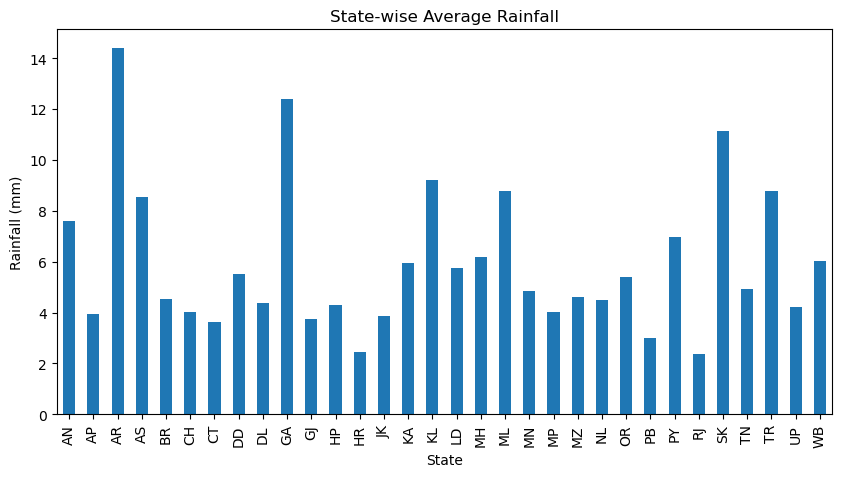

In [47]:
#State-wise Average Rainfall (Bar Chart)
import matplotlib.pyplot as plt
state_rain = df.groupby('state')['rainfall'].mean()

state_rain.plot(kind='bar', figsize=(10,5))
plt.title("State-wise Average Rainfall")
plt.xlabel("State")
plt.ylabel("Rainfall (mm)")
plt.show()

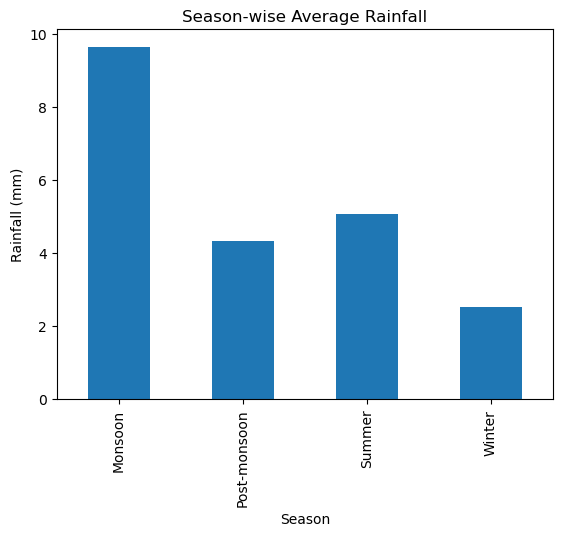

In [49]:
#Season-wise Average Rainfall (Bar Chart)
season_rain = df.groupby('season')['rainfall'].mean()
season_rain.plot(kind='bar')
plt.title("Season-wise Average Rainfall")
plt.xlabel("Season")
plt.ylabel("Rainfall (mm)")
plt.show()

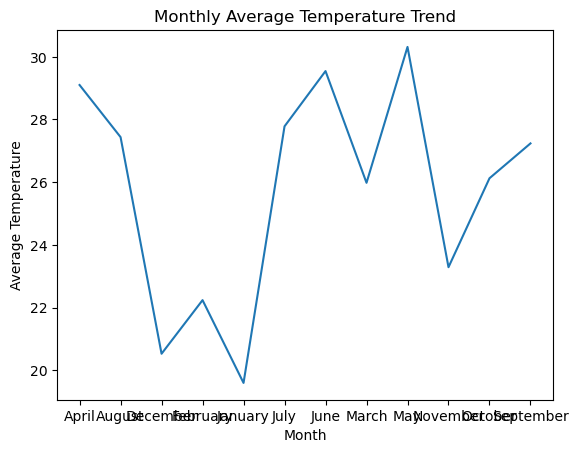

In [51]:
#Monthly Average Temperature Trend (Line Graph)
month_temp = df.groupby('month')['avg_temp'].mean()
plt.plot(month_temp)
plt.title("Monthly Average Temperature Trend")
plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.show()

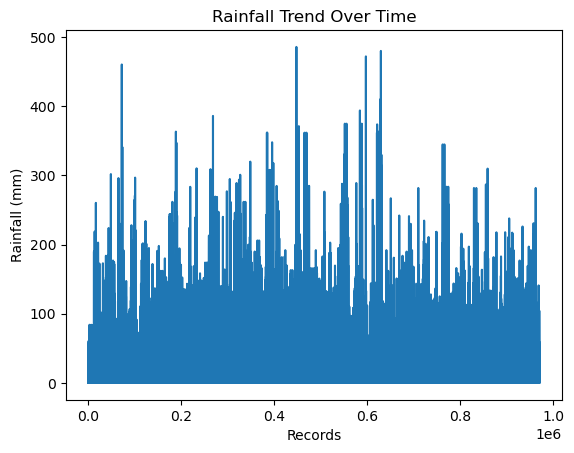

In [53]:
#Rainfall Trend Over Records (Line Graph)
plt.plot(df['rainfall'])
plt.title("Rainfall Trend Over Time")
plt.xlabel("Records")
plt.ylabel("Rainfall (mm)")
plt.show()

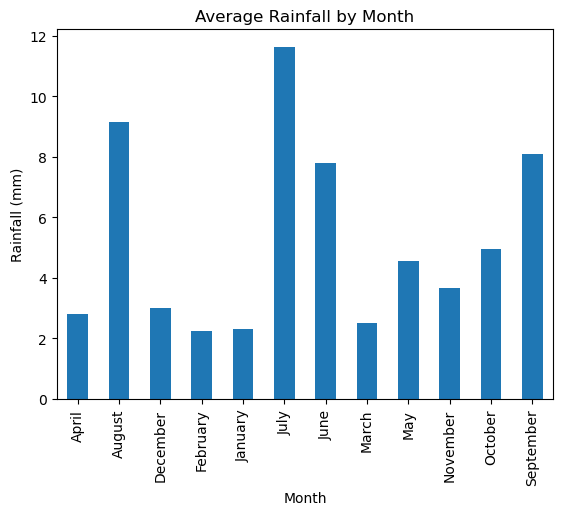

In [57]:
#Average Rainfall by Month (Bar Chart)
df.groupby('month')['rainfall'].mean().plot(kind='bar')
plt.title("Average Rainfall by Month")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.show()

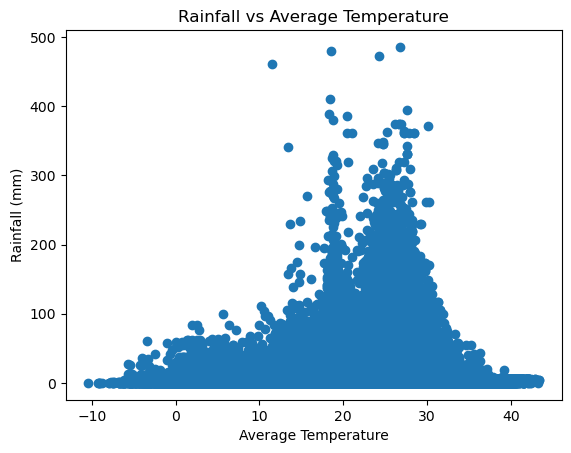

In [59]:
#Rainfall vs Average Temperature (Scatter Plot)
plt.scatter(df['avg_temp'], df['rainfall'])
plt.title("Rainfall vs Average Temperature")
plt.xlabel("Average Temperature")
plt.ylabel("Rainfall (mm)")
plt.show()

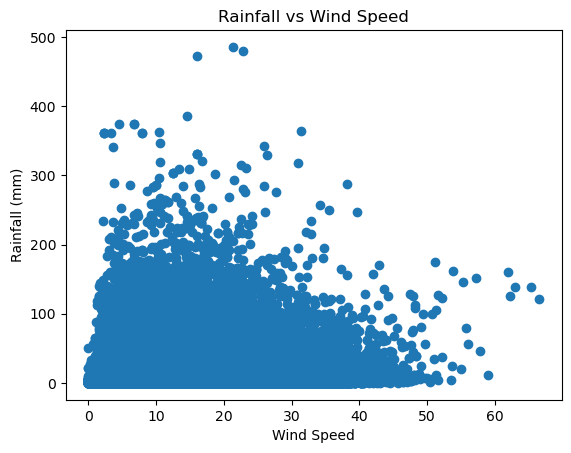

In [61]:
#Rainfall vs Wind Speed (Scatter Plot)
plt.scatter(df['wind_speed'], df['rainfall'])
plt.title("Rainfall vs Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("Rainfall (mm)")
plt.show()

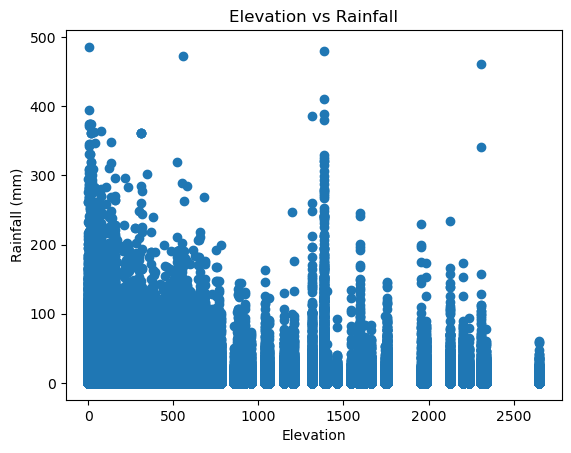

In [63]:
#Elevation vs Rainfall (Scatter Plot)
plt.scatter(df['elevation'], df['rainfall'])
plt.title("Elevation vs Rainfall")
plt.xlabel("Elevation")
plt.ylabel("Rainfall (mm)")
plt.show()

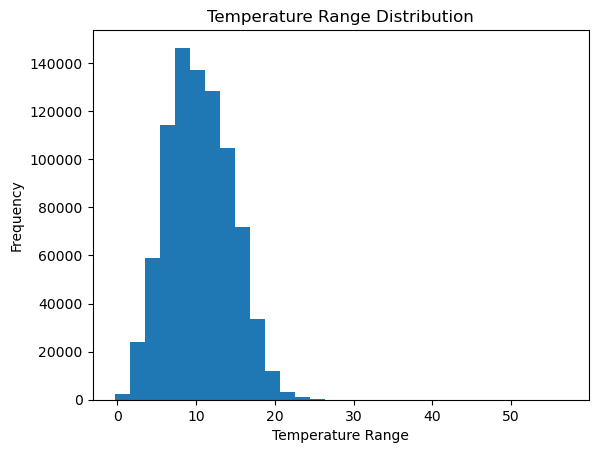

In [65]:
#Temperature Range Distribution (Histogram)
df['temp_range'] = df['max_temp'] - df['min_temp']

plt.hist(df['temp_range'].dropna(), bins=30)
plt.title("Temperature Range Distribution")
plt.xlabel("Temperature Range")
plt.ylabel("Frequency")
plt.show()

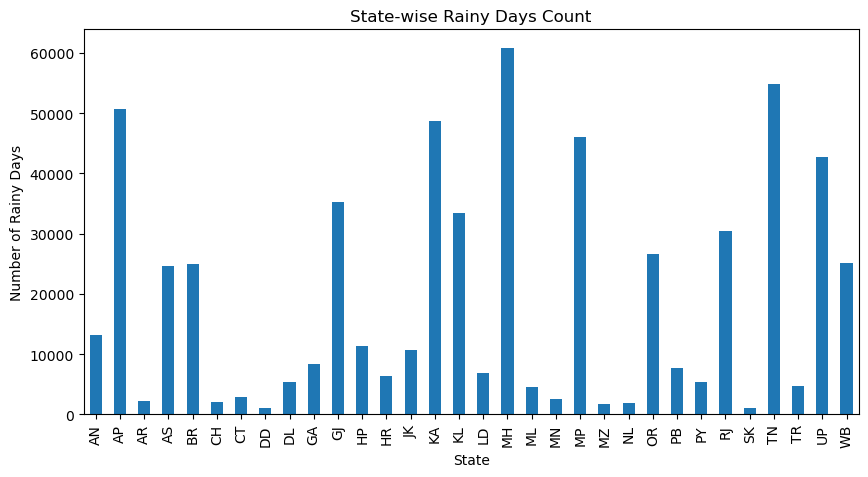

In [67]:
#State-wise Number of Rainy Days (Bar Chart)
rainy_days = df[df['rainfall'] > 0].groupby('state').size()

rainy_days.plot(kind='bar', figsize=(10,5))
plt.title("State-wise Rainy Days Count")
plt.xlabel("State")
plt.ylabel("Number of Rainy Days")
plt.show()

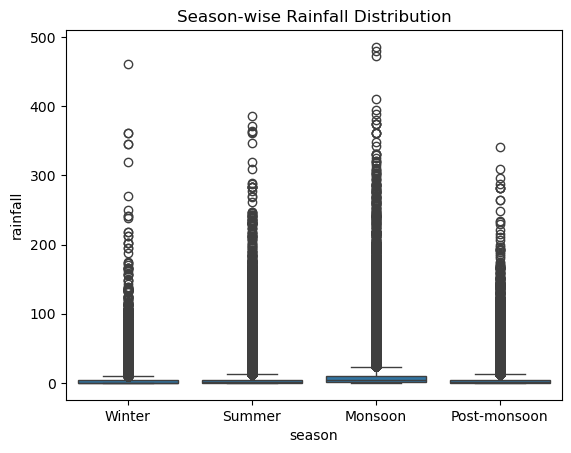

In [71]:
#Season-wise Rainfall Distribution (Box Plot)
import seaborn as sns
sns.boxplot(x='season', y='rainfall', data=df)
plt.title("Season-wise Rainfall Distribution")
plt.show()

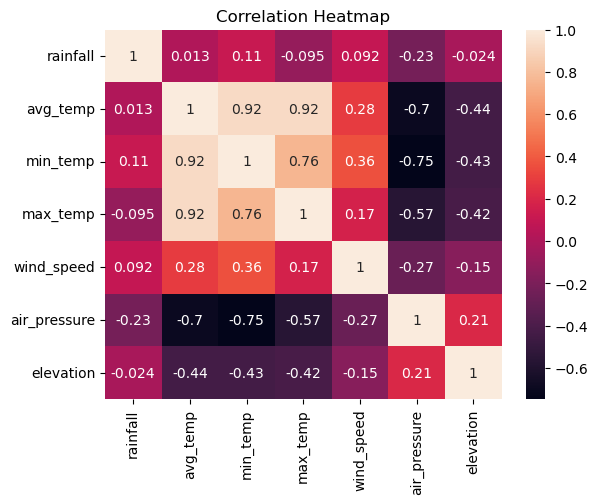

In [73]:
#Correlation Heatmap (Weather Parameters)
corr = df[['rainfall','avg_temp','min_temp','max_temp','wind_speed','air_pressure','elevation']].corr()

sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

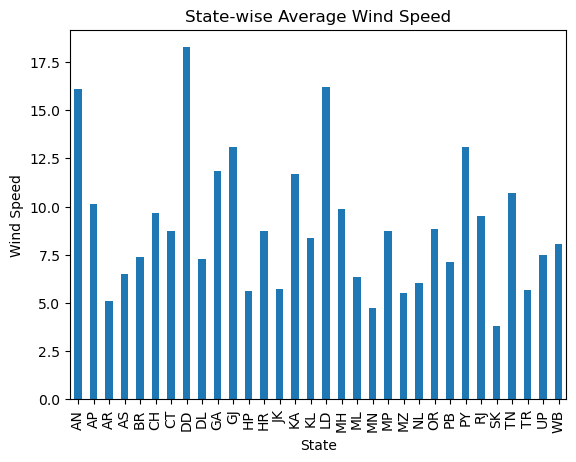

In [75]:
#State-wise Average Wind Speed (Bar Chart)
df.groupby('state')['wind_speed'].mean().plot(kind='bar')
plt.title("State-wise Average Wind Speed")
plt.xlabel("State")
plt.ylabel("Wind Speed")
plt.show()

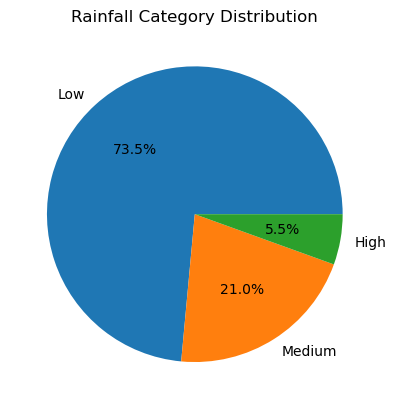

In [77]:
#Rainfall Category Distribution (Pie Chart)
def rain_cat(r):
    if r < 5:
        return 'Low'
    elif r < 20:
        return 'Medium'
    else:
        return 'High'

df['rainfall_category'] = df['rainfall'].apply(rain_cat)

df['rainfall_category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Rainfall Category Distribution")
plt.ylabel("")
plt.show()

In [79]:
#Handle Missing Values
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

num_cols = ['avg_temp','min_temp','max_temp','wind_speed',
            'air_pressure','rainfall']

for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

In [81]:
#Create Target Variable (Rainfall Category)
def rainfall_category(r):
    if r < 5:
        return "Low"
    elif r < 20:
        return "Medium"
    else:
        return "High"

df['rainfall_category'] = df['rainfall'].apply(rainfall_category)

In [83]:
#Encode Categorical Columns
le = LabelEncoder()
df['season'] = le.fit_transform(df['season'])
df['month'] = le.fit_transform(df['month'])
df['state'] = le.fit_transform(df['state'])

In [85]:
#Select Features & Target
X = df[['avg_temp','min_temp','max_temp',
        'wind_speed','air_pressure',
        'elevation','season','month','state']]

y = df['rainfall_category']

In [87]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [94]:
#Train ML Model (Random Forest)
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [96]:
#Make Predictions
y_pred = model.predict(X_test)

In [98]:
#Evaluate Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8567924644969804


In [100]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.66      0.42      0.51     10793
         Low       0.90      0.95      0.92    142691
      Medium       0.73      0.64      0.68     40584

    accuracy                           0.86    194068
   macro avg       0.76      0.67      0.71    194068
weighted avg       0.85      0.86      0.85    194068



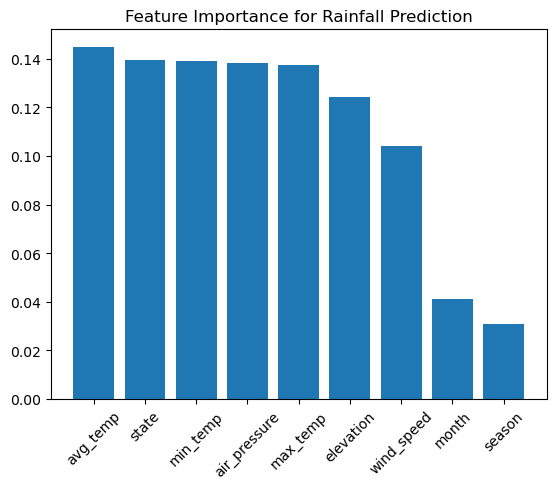

In [116]:
#Feature Importance Graph
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.bar(importance['Feature'], importance['Importance'])
plt.xticks(rotation=45)
plt.title("Feature Importance for Rainfall Prediction")
plt.show()

In [118]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[  4531   3027   3235]
 [   733 135632   6326]
 [  1652  12819  26113]]


In [120]:
#New unseen weather conditions
new_data = pd.DataFrame({
    'avg_temp': [29.5],
    'min_temp': [24.0],
    'max_temp': [34.0],
    'wind_speed': [12.5],
    'air_pressure': [1010],
    'elevation': [120],
    'season': [1],
    'month': [6],
    'state': [10]
})

In [122]:
#Predict Rainfall Category
prediction = model.predict(new_data)
print("Predicted Rainfall Category:", prediction[0])

Predicted Rainfall Category: Low
